Import necessory modules

In [0]:
import numpy as np
import pandas as pd
import os
import keras
import cv2
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Following code snippit is for colab users. Ignore it if you are not working on colab


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_dir = "/content/drive/My Drive/Virtual_Dermatologist/training_images"
!ls "/content/drive/My Drive/Virtual_Dermatologist/training_images"

Acne-and-Rosacea-Photos
Bullous-Disease-Photos
Cellulitis-Impetigo-and-other-Bacterial-Infections
Eczema-Photos
Melanoma-Skin-Cancer-Nevi-and-Moles
Nail-Fungus-and-other-Nail-Disease


`load_unique()` loads all the lables 

In [0]:
def load_unique():
    size_img = 256,256 
    images_for_plot = []
    labels_for_plot = []
    for folder in os.listdir(train_dir):
        for file in os.listdir(train_dir + '/' + folder):
            filepath = train_dir + '/' + folder + '/' + file
            image = cv2.imread(filepath)
            final_img = cv2.resize(image, size_img)
            final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
            images_for_plot.append(final_img)
            labels_for_plot.append(folder)
            break
    return images_for_plot, labels_for_plot

images_for_plot, labels_for_plot = load_unique()
print("unique_labels = ", labels_for_plot)

unique_labels =  ['Cellulitis-Impetigo-and-other-Bacterial-Infections', 'Melanoma-Skin-Cancer-Nevi-and-Moles', 'Bullous-Disease-Photos', 'Acne-and-Rosacea-Photos', 'Eczema-Photos', 'Nail-Fungus-and-other-Nail-Disease']


`plot_images()` is defined to visualise the images

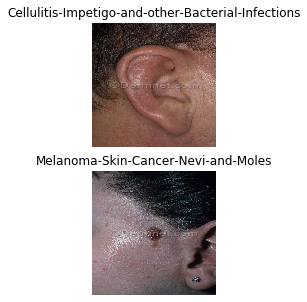

In [0]:
fig = plt.figure(figsize = (5,5))
def plot_images(fig, image, label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    plt.title(label)
    return

image_index = 0
row = 2
col = 1
for i in range(0,(row*col)):
    plot_images(fig, images_for_plot[image_index], labels_for_plot[image_index], row, col, i+1)
    image_index = image_index + 1
plt.show()

`load_data()` loads the images and labels and also split it for testing purpose

In [0]:
labels_dict = {'Acne-and-Rosacea':0,'Bullous-Disease':1,'Cellulitis-Impetigo-and-other-Bacterial-Infections':2
               ,'Eczema':3, 'Nail-Fungus':4, 'Melanoma-Skin-Cancer-Nevi-and-Moles':5}

def load_data():
    images = []
    labels = []
    size = 256,256
    print("LOADING DATA FROM : ",end = "")
    for folder in os.listdir(train_dir):
        print(folder, end = ' | ')
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            if folder == 'Acne-and-Rosacea-Photos':
                labels.append(labels_dict['Acne-and-Rosacea'])
            elif folder == 'Bullous-Disease-Photos':
                labels.append(labels_dict['Bullous-Disease'])
            elif folder == 'Cellulitis-Impetigo-and-other-Bacterial-Infections':
                labels.append(labels_dict['Cellulitis-Impetigo-and-other-Bacterial-Infections'])
            elif folder == 'Eczema-Photos':
                labels.append(labels_dict['Eczema'])
            elif folder == 'Melanoma-Skin-Cancer-Nevi-and-Moles':
                labels.append(labels_dict['Melanoma-Skin-Cancer-Nevi-and-Moles'])
            elif folder == 'Seborrheic-Keratoses-and-other-Benign-Tumors':
                labels.append(labels_dict['Seborrheic-Keratoses-and-other-Benign-Tumors'])
            elif folder == 'Nail-Fungus-and-other-Nail-Disease':
                labels.append(labels_dict['Nail-Fungus'])
    images = np.array(images)
    #images = images.astype('float32')/255.0
    
    templabels = labels
    
    labels = keras.utils.to_categorical(labels)
    
    X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.000000001)
    
    #print()
    #print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    #print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return X_train, Y_train, X_test, Y_test, templabels

In [0]:
X_train, Y_train,  X_test, Y_test, labels = load_data()

LOADING DATA FROM : Cellulitis-Impetigo-and-other-Bacterial-Infections | Melanoma-Skin-Cancer-Nevi-and-Moles | Bullous-Disease-Photos | Acne-and-Rosacea-Photos | Eczema-Photos | Nail-Fungus-and-other-Nail-Disease | 
Loaded 1447 images for training, Train data shape = (1447, 256, 256, 3)
Loaded 1 images for testing Test data shape = (1, 256, 256, 3)


Following code snippit normalise the image

In [0]:
#x_train = np.asarray(X_train.tolist())
#x_test = np.asarray(X_test.tolist())

x_train_mean = np.mean(X_train)
x_train_std = np.std(X_train)

x_test_mean = np.mean(X_test)
x_test_std = np.std(X_test)

x_train = (X_train - x_train_mean)/x_train_std
x_test = (X_test - x_test_mean)/x_test_std

In [0]:
x_train = (X_train)/255
x_test = (X_test)/255

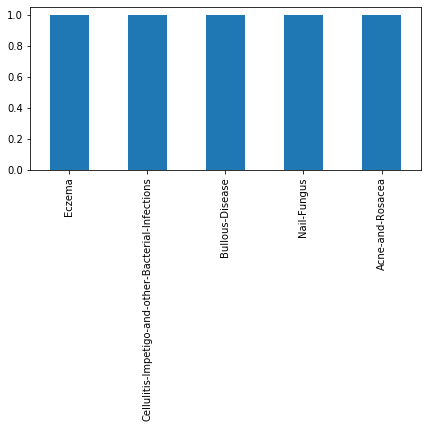

In [0]:
labelsdf = pd.DataFrame()
labelsdf["labels"] = labels_dict
labelsdf["labels"].value_counts().plot(kind = "bar", figsize = (7,3))

Following code snippit contains the CNN architecture

In [0]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, LeakyReLU, Activation
from keras.layers.advanced_activations import LeakyReLU

def create_model():
  input_shape = (256, 256, 3)
  num_classes = 6
  
 

  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
  model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
  model.add(MaxPool2D(pool_size = (2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
  model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))



  model.compile(loss='binary_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
  print("MODEL CREATED")
  model.summary()
  return model

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

from keras.callbacks import EarlyStopping
def fit_model():
  checkpoint = ModelCheckpoint(
        '/content/drive/My Drive/Virtual_Dermatologist/Checkpoints' + '/trial-weights-improvement-{epoch:02d}-{loss:.4f}-bigger.hdf5',
        monitor='loss',
        verbose=0,
        save_best_only=True,
        mode='min')
  #callbacks = [EarlyStopping(monitor='val_acc', patience=4, verbose=1, mode='max'), checkpoint]
  model_hist = model.fit(datagen.flow(x_train,Y_train, batch_size=32), epochs = 200,  validation_data = (x_test, Y_test), verbose=1)
  return model_hist

In [0]:
from keras.callbacks import EarlyStopping
def fit_model():
    #callbacks = [EarlyStopping(monitor='val_acc', patience=4, verbose=1, mode='max')]
    model_hist = model.fit(x_train, Y_train, batch_size = 32, epochs = 100, validation_split = 0.1, verbose=1)
    return model_hist

In [0]:
model = create_model()
curr_model_hist = fit_model()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
MODEL CREATED
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      18496     
______________________

Following code snippit saves the .h5 file of model

In [0]:
model.save('/content/drive/My Drive/Virtual_Dermatologist/Checkpoints/complete_trained_model_200epoc.h5')
model.save('/content/drive/My Drive/Virtual_Dermatologist/Checkpoints/complete_trained_model_200epoc.model')

NameError: ignored

Test accuracy is predicted as follows

In [0]:
evaluate_metrics = model.evaluate(x_test, Y_test)
print("\nEvaluation Accuracy = ", "{:.2f}%".format(evaluate_metrics[1]*100),"\nEvaluation loss = " ,"{:.6f}".format(evaluate_metrics[0]))

180/180 [==============================] - 5s 29ms/step

Evaluation Accuracy =  92.41% 
Evaluation loss =  0.313207


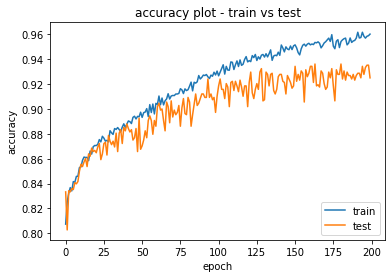

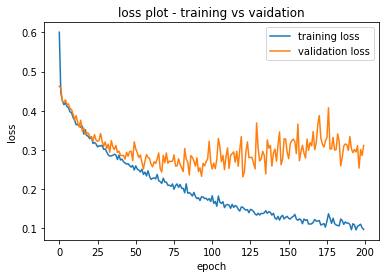

In [0]:
def plot_accuracy(y):
    if(y == True):
        plt.plot(curr_model_hist.history['acc'])
        plt.plot(curr_model_hist.history['val_acc'])
        plt.legend(['train', 'test'], loc='lower right')
        plt.title('accuracy plot - train vs test')
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.show()
    else:
        pass
    return

def plot_loss(y):
    if(y == True):
        plt.plot(curr_model_hist.history['loss'])
        plt.plot(curr_model_hist.history['val_loss'])
        plt.legend(['training loss', 'validation loss'], loc = 'upper right')
        plt.title('loss plot - training vs vaidation')
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.show()
    else:
        pass
    return


plot_accuracy(True)
plot_loss(True)

In [0]:
from keras.utils import to_categorical
from numpy import argmax

model = load_model('/content/drive/My Drive/Virtual_Dermatologist/Checkpoints/complete_trained_model_200epoc.model')
y_pred = np.round( model.predict_classes(x_test), 0)


In [0]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
y_pred1 = y_pred.reshape(len(y_pred), 1)
onehot_encoded = onehot_encoder.fit_transform(y_pred1)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
onehot_encoded

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [0]:
from sklearn.metrics import roc_auc_score

print("ROC AUC Score: ",roc_auc_score(Y_test, onehot_encoded))

ROC AUC Score:  0.8416646826902832


In [0]:
from sklearn.metrics import f1_score
from sklearn import metrics

print(metrics.classification_report(Y_test.argmax(axis = 1), y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.793     0.767     0.780        30
           1      1.000     0.615     0.762        26
           2      0.800     0.625     0.702        32
           3      0.481     0.862     0.617        29
           4      0.970     0.842     0.901        38
           5      0.760     0.760     0.760        25

    accuracy                          0.750       180
   macro avg      0.801     0.745     0.754       180
weighted avg      0.807     0.750     0.760       180



In [0]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test.argmax(axis=1), y_pred)
matrix

array([[23,  0,  2,  4,  0,  1],
       [ 2, 16,  1,  7,  0,  1],
       [ 1,  0, 20,  8,  0,  3],
       [ 1,  0,  1, 25,  1,  1],
       [ 1,  0,  1,  4, 32,  0],
       [ 1,  0,  0,  4,  0, 19]])

In [0]:
from sklearn.preprocessing import normalize

normed_matrix = normalize(matrix, axis=1, norm='l1')
normed_matrix

array([[0.76666667, 0.        , 0.06666667, 0.13333333, 0.        ,
        0.03333333],
       [0.07407407, 0.59259259, 0.03703704, 0.25925926, 0.        ,
        0.03703704],
       [0.03125   , 0.        , 0.625     , 0.25      , 0.        ,
        0.09375   ],
       [0.03448276, 0.        , 0.03448276, 0.86206897, 0.03448276,
        0.03448276],
       [0.02631579, 0.        , 0.02631579, 0.10526316, 0.84210526,
        0.        ],
       [0.04166667, 0.        , 0.        , 0.16666667, 0.        ,
        0.79166667]])

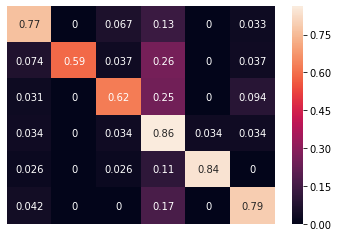

In [0]:
import seaborn as sns; 
ax = sns.heatmap(normed_matrix, annot=True)
ax

In [0]:
predicted = model.predict(X_test)
pdt = []
for i in predicted:
    if(i[0]>i[1]):
        pdt.append([1.,0.])
    else:
        pdt.append([0.,1.])
pdt = np.array(pdt)
#pdt

In [0]:
loaded_model = load_model('/content/drive/My Drive/Virtual_Dermatologist/Checkpoints/complete_trained_model_200epoc.h5')


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Following code snippit can be used to test model in realtime or on custom image

[[0.90244406 0.00186792 0.00805679 0.02487719 0.01055192 0.0035234 ]]
Acne


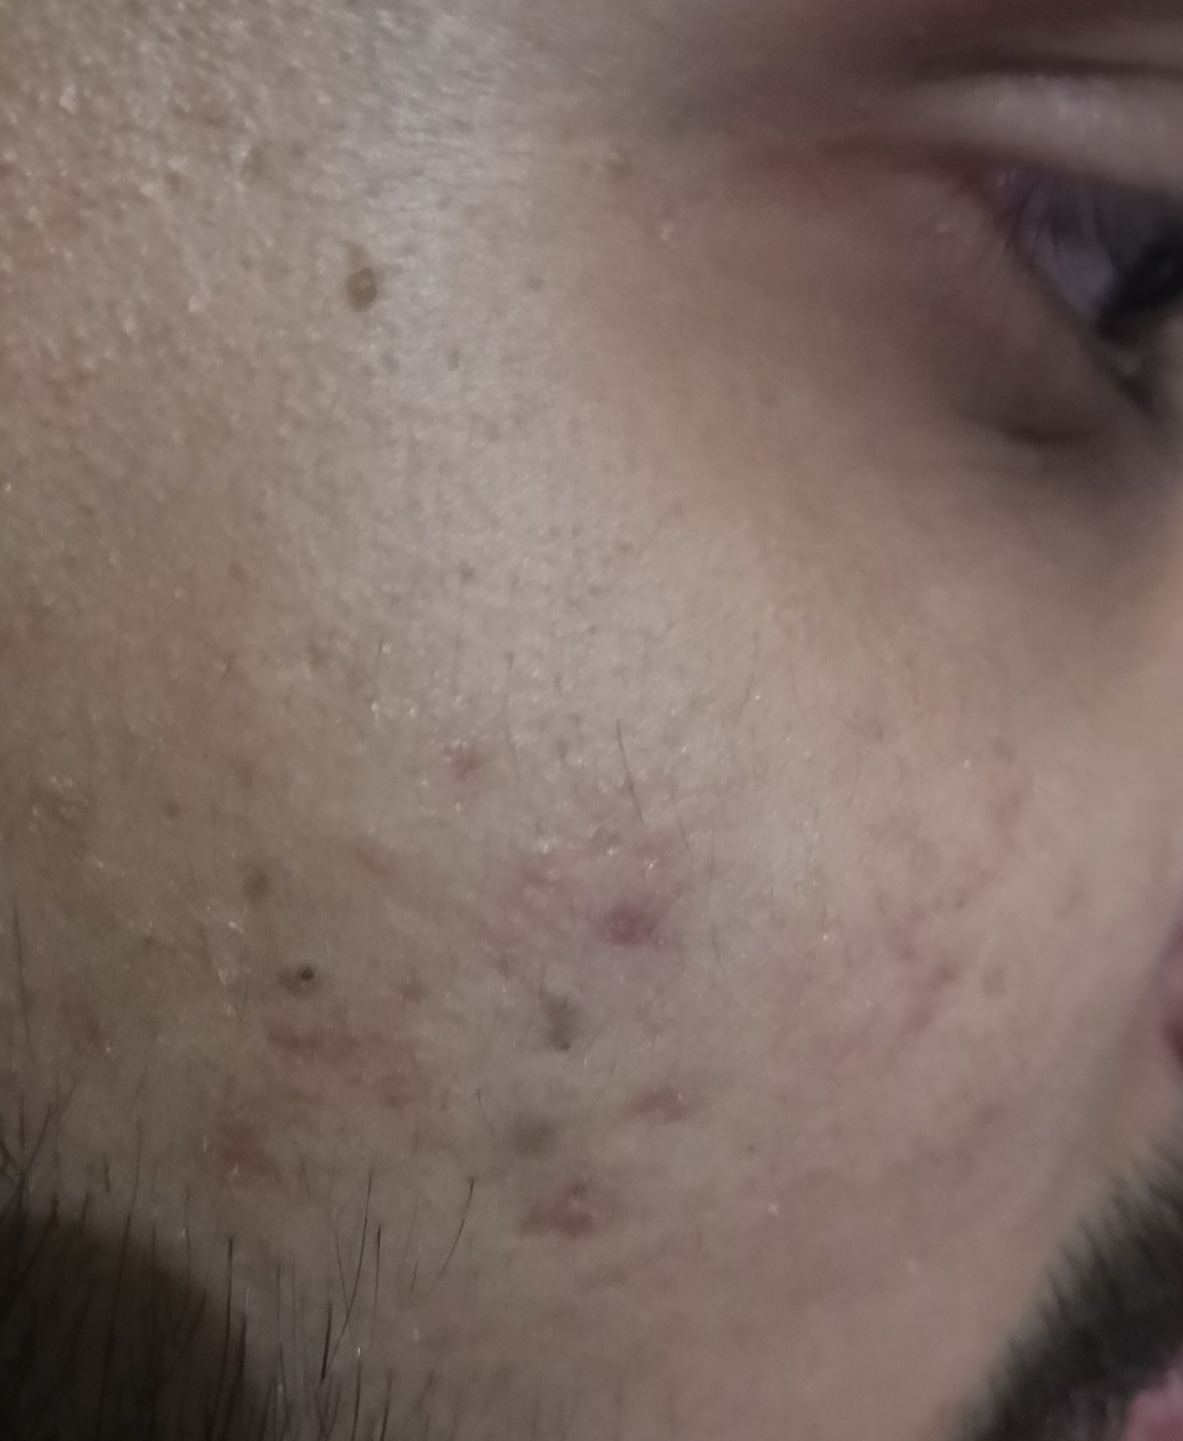

In [0]:
images = []
size = 256,256
img_file = '/content/drive/My Drive/Virtual_Dermatologist/Aditya.jpg'
temp_img = cv2.imread(img_file)
temp_img = cv2.resize(temp_img, size)
images.append(temp_img)

temp_img_mean = np.mean(images)
temp_img_std = np.std(images)

x_temp_img = (images -temp_img_mean)/temp_img_std
i = loaded_model.predict(x_temp_img)
print(i)

pred_lable = i[0].index(max(i[0]))

if(pred_lable==0):
    print("Acne")
elif(pred_lable==1):
    print("Bullous Disease")
elif(pred_lable=2):
  print("Cellulitus")
elif(pred_lable==3):
    print("Eczema")
elif(pred_lable==4):
    print("Melanoma")
elif(pred_lable==5):
    print("Nail Fungus")

from IPython.display import Image
Image(filename=img_file,
    width=256,
    height=256,)

Following code snippit converts the model to tflite file for further use in an android application

In [0]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model_file('/content/drive/My Drive/Virtual_Dermatologist/Checkpoints/complete_trained_model_200epoc.h5')
tflite_model = converter.convert()
open("/content/drive/My Drive/Virtual_Dermatologist/skin_tflite.tflite", "wb").write(tflite_model)

print("testf2.tflite generated")

Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 12 variables.
INFO:tensorflow:Converted 12 variables to const ops.
testf2.tflite generated
